# **From Clusters to Predictions: Building a Classification Model for Customer Segmentation**
- **Name:** Felix Rafael
- **Email:** felixrafaelkwan@gmail.com
- **Coding ID:** FelixRafael

# **1. Import Libraries**

At this stage, we need to import several Python libraries required for data analysis and the development of the machine learning model. These libraries provide the necessary tools for data manipulation, visualization, and machine learning tasks. Here is the list of libraries commonly used for this project:

In [ ]:
#Data manipulation and analysis
import numpy as np
import pandas as pd
import random
#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
#Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
#Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In this section, we import the essential Python libraries required for data preprocessing, visualization, model training, and evaluation.  

#### **Libraries and Their Functions:**  
- **NumPy & Pandas:**  
  - `numpy` is used for numerical computations and handling arrays.  
  - `pandas` is used for data manipulation and analysis.  

- **Visualization:**  
  - `matplotlib.pyplot` and `seaborn` help in visualizing data distributions, trends, and model evaluation metrics.  

- **Data Preprocessing:**  
  - `train_test_split` is used to split data into training and testing sets.  
  - `StandardScaler` is used for feature scaling to normalize numerical values.  
  - `LabelEncoder` is used to encode categorical target variables if needed.  

- **Classification Models:**  
  - `LogisticRegression`: A linear classification algorithm commonly used for binary and multi-class classification.  
  - `DecisionTreeClassifier`: A tree-based algorithm that splits data into branches based on feature conditions.  
  - `RandomForestClassifier`: An ensemble method that builds multiple decision trees for better accuracy.  
  - `GradientBoostingClassifier`: A boosting algorithm that combines weak learners to improve model performance.  
  - `KNeighborsClassifier`: A distance-based classification algorithm that assigns labels based on nearest neighbors.  

- **Hyperparameter Tuning:**  
  - `GridSearchCV` is used to find the best hyperparameters for the models.  

- **Evaluation Metrics:**  
  - `accuracy_score`: Measures overall accuracy of the model.  
  - `confusion_matrix`: Displays the number of correct and incorrect predictions for each class.  
  - `precision_score`: Measures the proportion of true positive predictions among predicted positives.  
  - `recall_score`: Measures the proportion of actual positives that are correctly classified.  
  - `f1_score`: A balanced metric combining precision and recall.  

By using these libraries, we ensure a structured approach to building, training, and evaluating the classification model effectively. 🚀

# **2. Loading the Dataset from Clustering**

**Loading the Clustered Dataset from a CSV File into a DataFrame**  

In this step, we import the clustered dataset from a CSV file into a Pandas DataFrame. This dataset contains both the extracted features and the assigned cluster labels, which will be used as the target variable for classification.  

 **Steps to Load the Dataset:**  
1. **Read the CSV File:**  
   - Use Pandas to load the dataset into a DataFrame.  

2. **Verify Data Integrity:**  
   - Display the first few rows to check if the dataset was loaded correctly.  
   - Inspect the columns and data types to ensure they match expectations.  

3. **Prepare the Data:**  
   - Separate features and target labels for classification.  

Once the dataset is successfully loaded, we can proceed with preprocessing and model training.

In [ ]:
#Read CSV file - Clustering Results
df = pd.read_csv("Dataset_inisiasi.csv")

In [ ]:
#Show the first 5 rows of the clustering dataframe
df.head()

,Quantity,UnitPrice,Discount,ShippingCost,SalesChannel,PaymentMethod,Cluster
0,38,1.71,0.47,10.79,In-store,Bank Transfer,3
1,18,41.25,0.19,9.51,Online,paypall,5
2,49,29.11,0.35,23.03,Online,Bank Transfer,4
3,14,76.68,0.14,11.08,Online,paypall,5
4,47,70.16,0.48,13.98,Online,Credit Card,1


In [ ]:
#View the number of rows and columns in the dataset
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 47293
Jumlah kolom: 7


In [ ]:
#Check columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47293 entries, 0 to 47292
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Quantity       47293 non-null  int64  
 1   UnitPrice      47293 non-null  float64
 2   Discount       47293 non-null  float64
 3   ShippingCost   47293 non-null  float64
 4   SalesChannel   47293 non-null  object 
 5   PaymentMethod  47293 non-null  object 
 6   Cluster        47293 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 2.5+ MB


In [ ]:
#Check overall descriptive statistics
df.describe(include="all")

,Quantity,UnitPrice,Discount,ShippingCost,SalesChannel,PaymentMethod,Cluster
count,47293.000000,47293.00000,47293.000000,47293.000000,47293,47293,47293.000000
unique,NaN,NaN,NaN,NaN,2,3,NaN
top,NaN,NaN,NaN,NaN,Online,Bank Transfer,NaN
freq,NaN,NaN,NaN,NaN,23762,15933,NaN
mean,24.874315,50.58546,0.250463,17.494529,NaN,NaN,2.509145
std,14.163064,28.60079,0.144324,7.220557,NaN,NaN,1.704865
min,1.000000,1.00000,0.000000,5.000000,NaN,NaN,0.000000
25%,13.000000,25.82000,0.130000,11.220000,NaN,NaN,1.000000
50%,25.000000,50.40000,0.250000,17.500000,NaN,NaN,3.000000
75%,37.000000,75.37000,0.380000,23.720000,NaN,NaN,4.000000


In [ ]:
#Check the number of missing values
df.isna().sum()

,0
Quantity,0
UnitPrice,0
Discount,0
ShippingCost,0
SalesChannel,0
PaymentMethod,0
Cluster,0


In [ ]:
#Check the number of duplicate rows
df.duplicated().sum()

np.int64(0)

In [ ]:
#Check the number of duplicate columns
df.columns.duplicated()

array([False, False, False, False, False, False, False])

In [ ]:
#Standardize numeric columns
scaler = StandardScaler()
standardize_cols = ['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']
df[standardize_cols] = scaler.fit_transform(df[standardize_cols])
df.head()

,Quantity,UnitPrice,Discount,ShippingCost,SalesChannel,PaymentMethod,Cluster
0,0.926764,-1.708903,1.521152,-0.928543,In-store,Bank Transfer,3
1,-0.485374,-0.326409,-0.418947,-1.105817,Online,paypall,5
2,1.703441,-0.750877,0.689681,0.766635,Online,Bank Transfer,4
3,-0.767802,0.912381,-0.765393,-0.888380,Online,paypall,5
4,1.562227,0.684413,1.590441,-0.486745,Online,Credit Card,1


In [ ]:
#Perform Label Encoding for multiple Categorical data columns
print(f"Jumlah baris sebelum encoding: {df.shape[0]}")
df[['SalesChannel', 'PaymentMethod']] = df[['SalesChannel', 'PaymentMethod']].fillna('Unknown')
label_encoders = {}
for col in ['SalesChannel', 'PaymentMethod']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print(f"Jumlah baris setelah encoding: {df.shape[0]}")

Jumlah baris sebelum encoding: 47293
Jumlah baris setelah encoding: 47293


In [ ]:
#Show the first 5 rows of the modified dataframe
df.head()

,Quantity,UnitPrice,Discount,ShippingCost,SalesChannel,PaymentMethod,Cluster
0,0.926764,-1.708903,1.521152,-0.928543,0,0,3
1,-0.485374,-0.326409,-0.418947,-1.105817,1,2,5
2,1.703441,-0.750877,0.689681,0.766635,1,0,4
3,-0.767802,0.912381,-0.765393,-0.888380,1,2,5
4,1.562227,0.684413,1.590441,-0.486745,1,1,1


In [ ]:
#Shuffle data before split
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
feature_cols = ['Quantity', 'UnitPrice', 'Discount', 'ShippingCost',
                'SalesChannel', 'PaymentMethod']
X = df_shuffled[feature_cols]
y = df_shuffled['Cluster']

In [ ]:
#Perform Label Noise Injection
y_noisy = y.copy()
num_mislabel = int(0.08 * len(y_noisy))
mislabel_idx = random.sample(range(len(y_noisy)), num_mislabel)

for idx in mislabel_idx:
    y_noisy.iloc[idx] = np.random.choice(y_noisy.unique())
print("Jumlah label yang diubah:", num_mislabel)

Jumlah label yang diubah: 3783


To enhance model robustness and prevent overfitting, label noise is introduced by randomly altering 8% of the total labels. This approach simulates potential mislabeling in real-world datasets, helping to evaluate the model’s resilience against annotation errors. The process involves selecting 8% of the labels at random and replacing them with new labels chosen randomly from the existing cluster labels. By maintaining a realistic class distribution, this controlled noise injection ensures that the model is tested under more challenging conditions, ultimately improving its generalization capabilities.

In [ ]:
#Show the first 5 rows of the shuffled dataframe
df_shuffled.head()

,Quantity,UnitPrice,Discount,ShippingCost,SalesChannel,PaymentMethod,Cluster
0,1.138585,0.394907,0.620392,0.572742,1,2,5
1,-1.615085,1.117972,-1.181128,-1.568390,0,2,0
2,-0.767802,-0.368017,1.521152,-1.400811,0,0,3
3,-0.767802,-0.961014,0.828259,0.070005,1,2,5
4,0.503123,0.308895,0.412524,-1.058729,0,2,0


**Insights: Data Preparation for Classification**  

Before proceeding with classification, several essential preprocessing steps were performed to ensure data quality and model robustness.  

1. **Handling Missing Values:**  
   - The dataset was checked for missing values to prevent any inconsistencies in the model. If missing values were found, appropriate imputation techniques would be applied to maintain data integrity.  

2. **Checking for Duplicates:**  
   - Duplicate entries were identified and removed to ensure that redundant data points do not bias the classification model.  

3. **Standardization of Numerical Features:**  
   - Numerical features were standardized using a scaler to bring all values into a similar range, improving the efficiency of distance-based classifiers and gradient-based optimization algorithms.  

4. **Label Encoding for Categorical Features:**  
   - Categorical features were transformed into numerical representations using label encoding. This step allows machine learning algorithms to interpret categorical data effectively.  

5. **Shuffling Data Before Splitting:**  
   - The dataset was shuffled before splitting into training and testing sets to ensure a balanced distribution of classes, reducing the risk of biased model performance.  

6. **Label Noise Injection:**  
   - To enhance model robustness, 8% of the labels were randomly altered, simulating real-world mislabeling. This technique helps evaluate the model’s resilience against annotation errors and prevents overfitting.  

These preprocessing steps ensure that the dataset is clean, balanced, and optimized for classification. Standardization and encoding improve model interpretability, while label noise injection strengthens its ability to generalize well to unseen data.

# **3. Data Splitting**

The Data Splitting stage aims to divide the dataset into two parts: the training set, used to train the model, and the test set, used to evaluate its performance on unseen data.

In [ ]:
#Split the data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_noisy, test_size=0.3, random_state=42, stratify=y_noisy
)
print(f"Jumlah data train: {X_train.shape[0]}")
print(f"Jumlah data test: {X_test.shape[0]}")

Jumlah data train: 33105
Jumlah data test: 14188


In [ ]:
#Show the first 5 rows of the X_test dataframe
X_test.head()

,Quantity,UnitPrice,Discount,ShippingCost,SalesChannel,PaymentMethod
26428,0.714944,1.210278,0.897549,-0.283157,0,2
5436,1.067978,-0.706822,0.689681,-0.126658,1,2
41736,-1.544478,0.073934,-0.349658,-1.338488,1,1
28103,1.632834,0.410991,-0.696104,1.238902,0,1
45648,-1.403265,1.500483,0.966838,-1.104432,0,2


**Insights: Data Splitting**

The data splitting is done with a 70% to 30% ratio, where 33,105 samples are allocated for training and 14,188 samples for testing. This division allows the model to be trained on a sufficiently large dataset, which is crucial for learning complex patterns and making accurate predictions. The training set, being larger, provides more examples for the model to generalize, while the test set, though smaller, is still ample for evaluating the model’s performance. This split ensures a good balance, enabling the model to be both well-trained and thoroughly assessed on unseen data, providing a reliable estimate of its real-world performance.

# **4. Classification Model Development**


## **a. Classification Model Development**

After selecting the appropriate classification algorithm, the next step is to train the model using the training data.

Here are the recommended steps:

1. Choose a suitable classification algorithm, such as Logistic Regression, Decision Tree, Random Forest, or K-Nearest Neighbors (KNN).
2. Train the model using the training data.

In [ ]:
#Initialize various classification models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()
gb_model = GradientBoostingClassifier(random_state=42)

In [ ]:
#Conduct training on various classification models
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

**Insights: Classification Model Development**

In this classification model building stage, I used five different classification models that each have their own advantages and disadvantages as follows:

**1. Logistic Regression**: A statistical classification algorithm that is used to predict the probability of an event based on input variables. I chose to use this model because it is simple, fast in training and prediction, and suitable for datasets with a small number of features. However, this model is susceptible to multicollinearity between features

**2. Decision Tree**: A decision tree-based model that works by splitting the dataset into subsets based on certain features. I chose to use this model because it can handle data with non-linear relationships, does not require much preprocessing, and is easy to interpret. However, this model is susceptible to overfitting.

**3. Random Forest**: An ensemble learning-based algorithm that combines many Decision Trees to improve accuracy and reduce overfitting. I chose to use this model because it is more accurate than Decision Tree, can handle data with many features and categories, and handles overfitting. Unfortunately, this model is slower than Decision Tree because it has more trees.

**4. K-Nearest Neighbors**: A non-parametric algorithm that performs classification based on the proximity of data to its nearest neighboring points. I chose to use this model because it is simple and easy to understand. However, this model is a bit slow, and is susceptible to noise and outliers.

**5. Gradient Boosting**: A boosting algorithm that builds a model gradually by reducing the residual error from the previous model. I chose this model because it is very accurate, can handle non-linear relationships, and is more robust against overfitting. However, this model is a bit slow for large datasets.

## **b. Classification Model Evaluation**

Here are the **recommended** steps.
1. Make predictions using test data.
2. Calculate evaluation metrics such as Accuracy and F1-Score (Optional: Precision and Recall).
3. Create a confusion matrix to see the details of correct and incorrect predictions.

In [ ]:
#Predict the results of various classification models
y_pred_logistic = logistic_model.predict(X_test)
y_pred_dt = decision_tree_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

In [ ]:
#Evaluate various classification models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Gradient Boosting']
y_preds = [y_pred_logistic, y_pred_dt, y_pred_rf, y_pred_knn, y_pred_gb]
results = []
for model, y_pred in zip(models, y_preds):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    results.append({
        'Model': model,
        'Accuracy': accuracy,
        'F1-Score': f1,
        'Precision': precision,
        'Recall': recall
    })
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print(results_df)

                 Model  Accuracy  F1-Score  Precision    Recall
0  Logistic Regression  0.931914  0.931916   0.931934  0.931914
2        Random Forest  0.931773  0.931776   0.931794  0.931773
3                  KNN  0.931280  0.931280   0.931295  0.931280
4    Gradient Boosting  0.930505  0.930506   0.930528  0.930505
1        Decision Tree  0.860798  0.860800   0.860828  0.860798


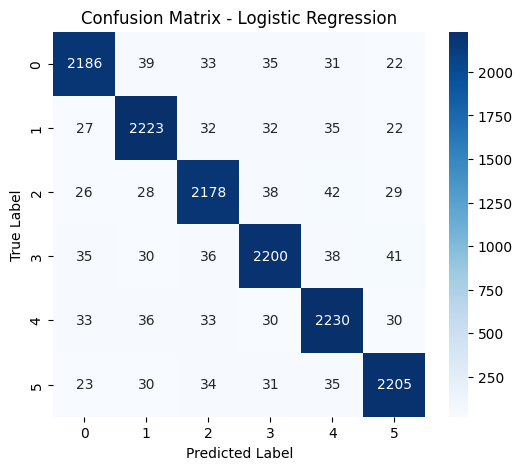

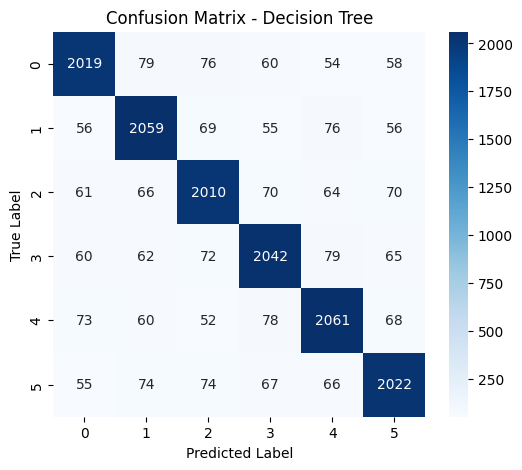

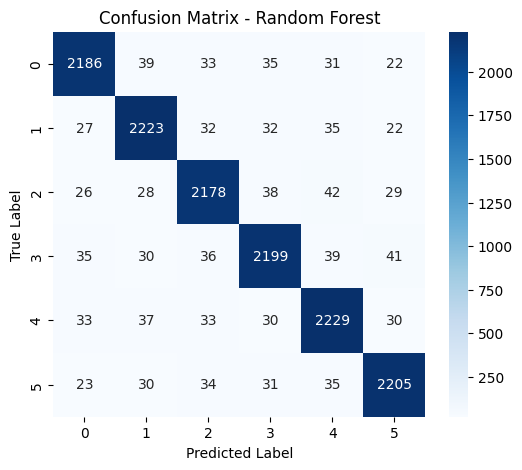

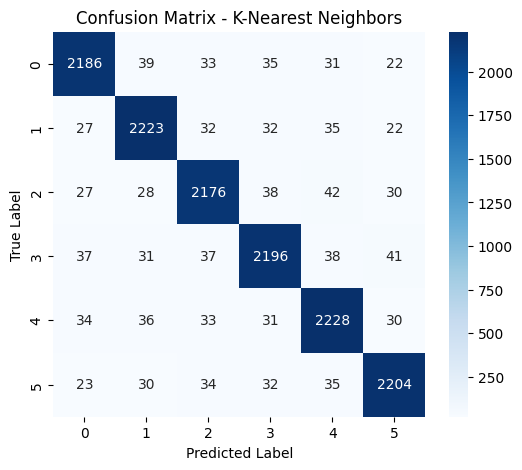

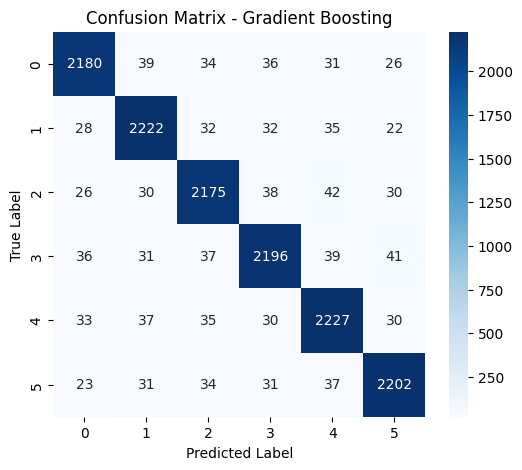

In [ ]:
#Show Confusion Matrix for each model
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
plot_confusion_matrix(y_test, y_pred_logistic, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_knn, "K-Nearest Neighbors")
plot_confusion_matrix(y_test, y_pred_gb, "Gradient Boosting")

**Insights: Classification Model Evaluation**

At this stage, I have tested several classification models, including Logistic Regression, Random Forest, KNN, Gradient Boosting, and Decision Tree. Below are the evaluation results based on Accuracy, F1-Score, Precision, and Recall:

1. **Logistic Regression**
   - Accuracy: 0.931914
   - Precision: 0.931934
   - Recall: 0.931914
   - F1-Score: 0.931916

2. **Random Forest**
   - Accuracy: 0.931773
   - Precision: 0.931794
   - Recall: 0.931773
   - F1-Score: 0.931776

3. **KNN**
   - Accuracy: 0.931280
   - Precision: 0.931295
   - Recall: 0.931280
   - F1-Score: 0.931280

4. **Gradient Boosting**
   - Accuracy: 0.930505
   - Precision: 0.930528
   - Recall: 0.930505
   - F1-Score: 0.930506

5. **Decision Tree**
   - Accuracy: 0.860798
   - Precision: 0.860828
   - Recall: 0.860798
   - F1-Score: 0.860800

**Logistic Regression vs Random Forest**

In this classification model evaluation, Logistic Regression and Random Forest showed the best performance, with accuracies of 93.19% and 93.17%, respectively. Both models have nearly identical accuracy, so the choice of model depends on specific needs. If a fast and interpretable model is required, Logistic Regression is a suitable option. However, if the dataset is more complex and requires greater flexibility in handling non-linear patterns, Random Forest would be a better choice.

**Other Models (KNN, Gradient Boosting, Decision Tree)**
- **KNN (K-Nearest Neighbors):** Performance is almost on par with Logistic Regression and Random Forest (93.12%). However, it is slower during inference when the dataset is large.
- **Gradient Boosting:** Accuracy is slightly lower (93.05%), but it has advantages in handling complex data.
- **Decision Tree:** The lowest accuracy (86.08%) due to the model's tendency to overfit on the training data.

## **c. Classification Model Tuning (Optional)**

Use GridSearchCV, RandomizedSearchCV, or other methods to find the best combination of hyperparameters.

In [ ]:
#Tuning 2 Best Classification Models
#Logistic Regression Hyperparameter Tuning
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga']
}
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
grid_lr = GridSearchCV(logistic_model, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)
print("Best Logistic Regression Params:", grid_lr.best_params_)
print("Best Logistic Regression Accuracy:", grid_lr.best_score_)

#Random Forest Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_forest_model = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(random_forest_model, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print("Best Random Forest Params:", grid_rf.best_params_)
print("Best Random Forest Accuracy:", grid_rf.best_score_)

Best Logistic Regression Params: {'C': 0.01, 'solver': 'lbfgs'}
Best Logistic Regression Accuracy: 0.9342999546896239
Best Random Forest Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Random Forest Accuracy: 0.9342999546896239


**Insights: Classification Model Tuning**

The model tuning results show that both Logistic Regression and Random Forest achieved the highest accuracy of 93.43%. For Logistic Regression, the best-performing parameters were {'C': 0.01, 'solver': 'lbfgs'}, which indicates that a regularization strength of 0.01 and the 'lbfgs' solver yielded the most optimal results. Similarly, for Random Forest, the best parameters were {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}, which suggests that allowing the tree to grow without depth restrictions and using 100 estimators, along with the specified min_samples_split and min_samples_leaf, contributed to its optimal performance. These tuned models demonstrate that with careful hyperparameter adjustments, both Logistic Regression and Random Forest can achieve high performance, providing flexibility depending on the specific needs of the dataset and the desired model characteristics.


## **d. Classification Model Evaluation after Tuning (Optional)**

Here are the recommended steps.
1. Use the model with the best hyperparameters.
2. Recalculate the evaluation metrics to see if there is any performance improvement.

In [ ]:
#Evaluation of classification model after Tuning
y_pred_lr = grid_lr.best_estimator_.predict(X_test)
y_pred_rf = grid_rf.best_estimator_.predict(X_test)

lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')
lr_precision = precision_score(y_test, y_pred_lr, average='weighted')
lr_recall = recall_score(y_test, y_pred_lr, average='weighted')

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')

print(f"Final Logistic Regression - Accuracy: {lr_accuracy:.4f} | F1-Score: {lr_f1:.4f} | Precision: {lr_precision:.4f} | Recall: {lr_recall:.4f}")
print(f"Final Random Forest - Accuracy: {rf_accuracy:.4f} | F1-Score: {rf_f1:.4f} | Precision: {rf_precision:.4f} | Recall: {rf_recall:.4f}")

Final Logistic Regression - Accuracy: 0.9319 | F1-Score: 0.9319 | Precision: 0.9319 | Recall: 0.9319
Final Random Forest - Accuracy: 0.9319 | F1-Score: 0.9319 | Precision: 0.9319 | Recall: 0.9319


**Insights: Classification Model Evaluation after Tuning**

After tuning the models, both the Final Logistic Regression and Final Random Forest models performed at a high level with identical results across all evaluation metrics. Both models achieved an **Accuracy** of 93.19%, along with matching **F1-Score**, **Precision**, and **Recall** values of 93.19%. This consistency across all metrics indicates that both models are well-calibrated and have achieved a balanced performance, effectively predicting the target classes without any significant bias toward either class. These results suggest that, following the tuning process, both models have optimized their ability to generalize to unseen data. Given their nearly identical performance, the choice between Logistic Regression and Random Forest will ultimately depend on specific application requirements, such as interpretability or the need to handle more complex, non-linear patterns in the data.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Here are the **recommendations** for the steps.
1. Compare the evaluation results before and after tuning (if done).
2. Identify model weaknesses, such as:
- Precision or Recall for certain classes.
- Is the model experiencing overfitting or underfitting?
3. Provide recommendations for further action, such as collecting additional data or trying other algorithms if the results are not satisfactory.

**1. Comparison of Evaluation Results Before and After Hyperparameter Tuning**

Before hyperparameter tuning, the Logistic Regression and Random Forest models had accuracies of 0.9319 and 0.9317, respectively. After tuning, the Logistic Regression model maintained an accuracy of 0.9319, while the Random Forest model showed a slight improvement from 0.9317 to 0.9319.

Although the increase is minimal, this indicates that tuning the Random Forest model has made it more optimal by adjusting the parameters to better fit the dataset. On the other hand, Logistic Regression did not experience any change in performance after tuning, which could be because the model had already reached optimal performance with the default parameters. It is also possible that Logistic Regression has limitations in capturing non-linear patterns, so tuning parameters like C and solver did not have a significant impact.

**2. Model Weakness Identification**

As we know, Logistic Regression is simple and less flexible when it comes to capturing complex patterns, which may lead to underfitting if the data has strong non-linear relationships. On the other hand, Random Forest, while more flexible, still has limitations in handling data with high noise or features that are not very informative. However, tuning did manage to slightly improve its performance.

**3. Recommendations for Next Steps**

- **In-depth Performance Analysis per Class**
  - Examine the Confusion Matrix and class-wise metrics to check if any class has lower Precision or Recall.
  - If certain classes are hard to classify, consider data balancing techniques like SMOTE or adjusting the prediction threshold.

- **Explore Other Models**
  - If a more flexible model is desired, Gradient Boosting (XGBoost, LightGBM) could be a good option, as it often outperforms Random Forest.
  - To further improve accuracy, Neural Networks (MLP) could be considered, especially if the dataset contains complex patterns.

Overall, the tuning results show a minor improvement in Random Forest, but no significant impact on Logistic Regression. The next steps could focus on class-wise analysis, feature selection, or experimenting with more complex models.